In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Regression Models
## Live Demos

In [3]:
x = np.linspace(-5, 5, 20)

In [4]:
y = 2 * x + 3

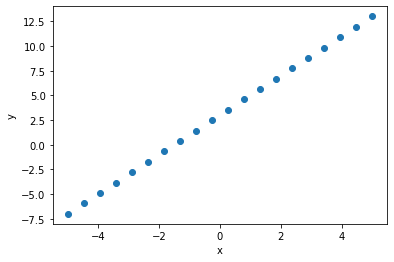

In [5]:
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [6]:
x = np.linspace(-5, 5, 20)
y = 2 * x + 3
y_noise = np.random.normal(loc = 0, scale = 2.5, size = len(x))
y += y_noise

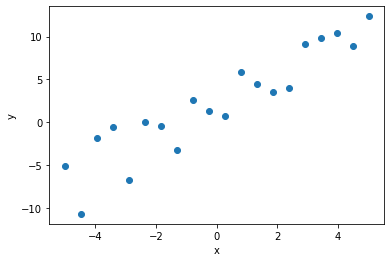

In [7]:
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [8]:
x

array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
       -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
        0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
        2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ])

In [9]:
y

array([ -5.13182416, -10.71142948,  -1.87638763,  -0.52049088,
        -6.78498926,   0.048391  ,  -0.44495211,  -3.24911268,
         2.56469222,   1.34138058,   0.68047939,   5.8317919 ,
         4.47036903,   3.47327927,   3.97417149,   9.09029656,
         9.86263665,  10.38656276,   8.87786177,  12.37253284])

In [10]:
x = np.array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
       -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
        0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
        2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ])

In [11]:
y = np.array([-8.60267745, -8.04975533, -4.55387595, -3.43429694,  2.09969136,
       -4.09064955, -0.75635273,  0.20198058, -2.65483127,  1.98965128,
        1.67746488,  4.54214862,  7.19450048,  6.60315961,  5.92143454,
       12.44515194,  3.15421522, 13.33765313, 10.82866825, 14.30046017])

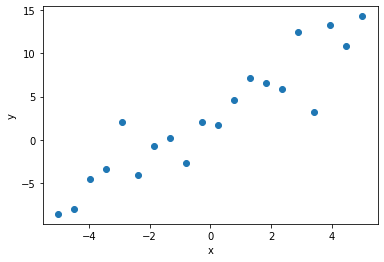

In [12]:
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [13]:
def plot_prediction(x, y, a, b):
    y_pred = a * x + b

    plt.scatter(x, y)
    plt.plot(x, y_pred, c = "r", label = "prediction")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

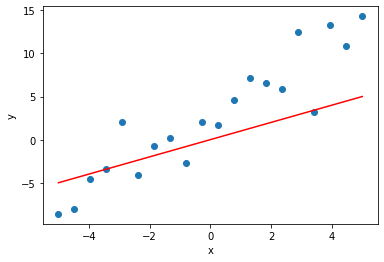

In [14]:
plot_prediction(x, y, 1, 0)

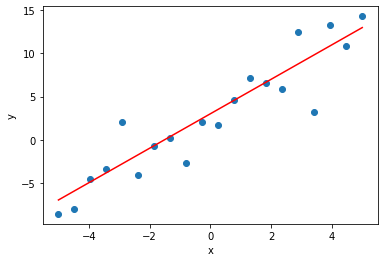

In [15]:
plot_prediction(x, y, 2, 3)

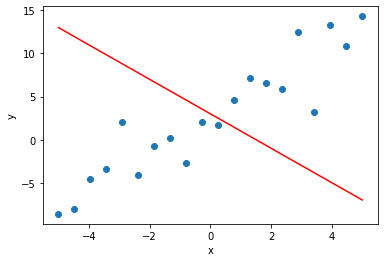

In [16]:
plot_prediction(x, y, -2, 3)

In [17]:
def compute_loss(x, y, a, b):
    y_pred = a * x + b
    distances = (y - y_pred) ** 2
    return distances.mean()

In [18]:
compute_loss(x, y, 1, 0)

22.918012606003778

In [19]:
compute_loss(x, y, 2, 3)

6.48812265577958

In [20]:
compute_loss(x, y, -2, 3)

156.14950914341324

In [21]:
def plot_prediction(x, y, a, b):
    y_pred = a * x + b

    plt.scatter(x, y)
    plt.plot(x, y_pred, c = "r", label = f"loss:{compute_loss(x, y, a, b)}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

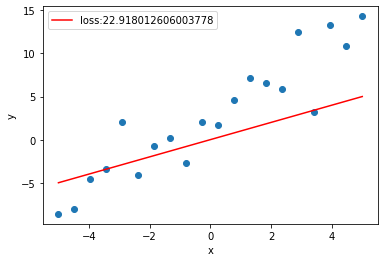

In [22]:
plot_prediction(x, y, 1, 0)

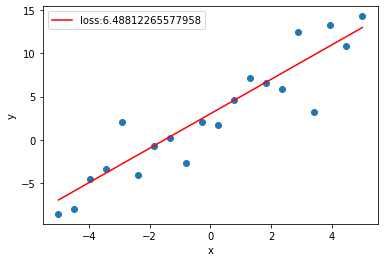

In [23]:
plot_prediction(x, y, 2, 3)

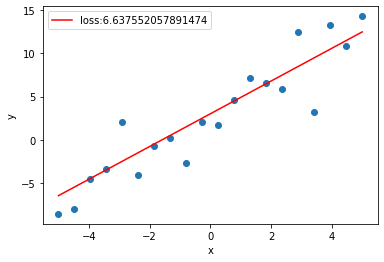

In [24]:
plot_prediction(x, y, 1.9, 3)

In [25]:
def perform_step(x, y, a, b, learning_rate):
    a_gradient = -2 / len(x) * np.sum(x * (y - (a * x + b)))
    b_gradient = -2 / len(y) * np.sum(y - (a * x + b))
    
    a_new = a - learning_rate * a_gradient
    b_new = b - learning_rate * b_gradient
    
    return (a_new, b_new)

In [26]:
a_guess, b_guess = -10, 20
learning_rate = 0.01

for step in range(1000):
    a_guess, b_guess = perform_step(x, y, a_guess, b_guess, learning_rate)
print(a_guess, b_guess)

2.031118818358843 2.6076870712706954


In [27]:
a_guess, b_guess = 0, 0
learning_rate = 0.01

for step in range(1000):
    a_guess, b_guess = perform_step(x, y, a_guess, b_guess, learning_rate)
print(a_guess, b_guess)

2.031118818358843 2.607687037611348


In [28]:
a_guess, b_guess = 10, 200
learning_rate = 0.01

for step in range(1000):
    a_guess, b_guess = perform_step(x, y, a_guess, b_guess, learning_rate)
print(a_guess, b_guess)

2.031118818358845 2.6076873742048194


In [29]:
a_guess, b_guess = -10, 20
learning_rate = 0.01

for step in range(100_000):
    a_guess, b_guess = perform_step(x, y, a_guess, b_guess, learning_rate)
print(a_guess, b_guess)

2.031118818358843 2.607687042000011


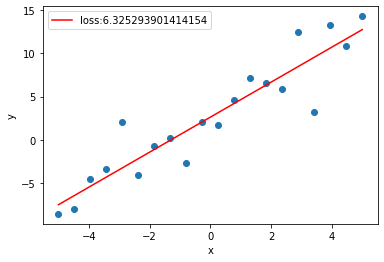

In [30]:
plot_prediction(x, y, a_guess, b_guess)

In [31]:
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)
print(model.coef_, model.intercept_)

[2.03111882] 2.6076870420000002
